In [1]:
#Add matplotlib inline magic command 
%matplotlib inline

#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read files into pandas
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
#Inspect the city data
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
#Check driver_count column integer type
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
#Get the number of data points from the Urban cities
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df["type"]=="Suburban")

36

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
#Inspect the ride data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
#Check data types for ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
#Merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
#Show new dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
#Create Urban df
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Create Suburban df
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [15]:
#Create rural df
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
#urban ride count
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"] 
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
#suburban ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [18]:
#rural ride count
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
#Average fare for each urban city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
#Average fare for sub and rural
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [21]:
#Urban driver count average
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
#sub and rural average driver count
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

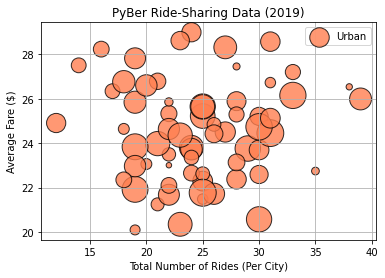

In [23]:
#Create the urban bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, 
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidth=1,
            alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

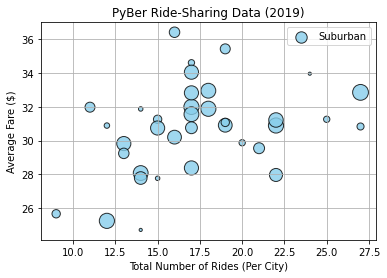

In [24]:
#Suburban chart
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidth=1,
            alpha=0.8, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

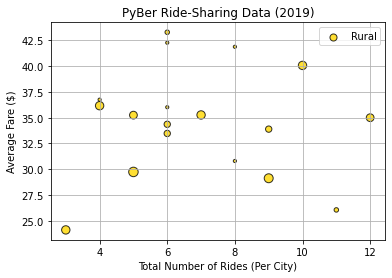

In [25]:
#Rural chart
plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidth=1,
            alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

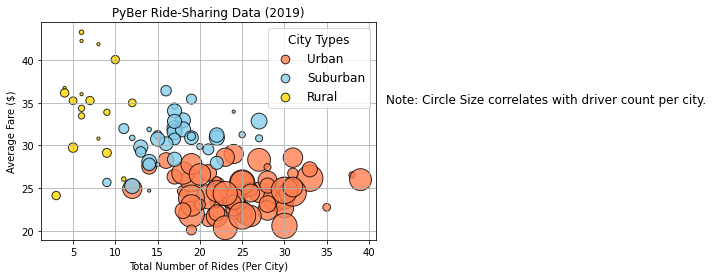

In [26]:
#Combine the scatter charts
plt.scatter(urban_ride_count, urban_avg_fare, 
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidth=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidth=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidth=1,
            alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
#Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
#Add a text label
plt.text(42, 35, "Note: Circle Size correlates with driver count per city.", fontsize="12")
#Save the plot
plt.savefig("analysis/Fig1.png")

In [27]:
#Rural Summary
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
#Suburban summary
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
#Urban summary
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [30]:
#Median of ride counts per city type: Suburban, Urban, Rural 
round(suburban_ride_count.median(), 2), round(urban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(17.0, 24.0, 6.0)

In [31]:
#Mode for city types suburban, urban, rural
suburban_ride_count.mode(), urban_ride_count.mode(), rural_ride_count.mode()

(0    17
 dtype: int64,
 0    22
 1    25
 dtype: int64,
 0    6
 dtype: int64)

In [32]:
#Calculate the measures of central tendency for the ride count for Urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [33]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban cities is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban cities is ModeResult(mode=array([17]), count=array([7])).


In [34]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural cities is {mode_rural_ride_count}.")

The mode for the ride counts for rural cities is ModeResult(mode=array([6]), count=array([5])).


In [35]:
#Get the fare for each city type
urban_fares = urban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.") 
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
#Calculate for rural
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

In [38]:
#Calculate for suburban
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

In [39]:
#Get the driver count data for cities
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [40]:
#Driver summary by city type
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.mean(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.mean(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drvers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mean_suburban_drivers

13.712

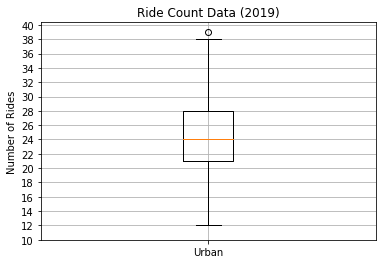

In [41]:
#Create a box and whisker plit for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

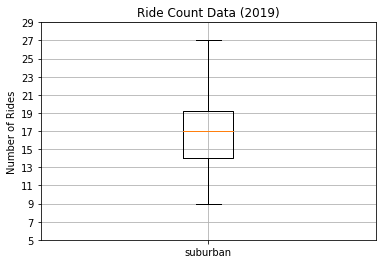

In [42]:
#Create a box and whisker plit for the urban cities ride count
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()
plt.show()

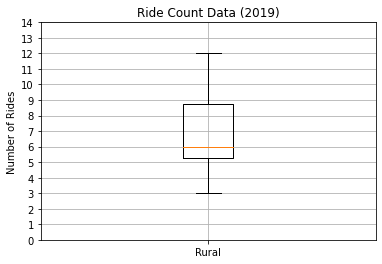

In [43]:
#Create box and whisker for rural
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
#Title
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 15, step=1.0))
ax.grid()
plt.show()

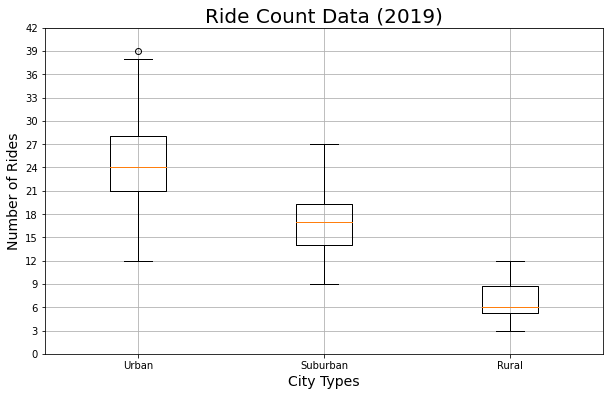

In [44]:
#Plot suburban, urban and rural on box and whisker
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [45]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


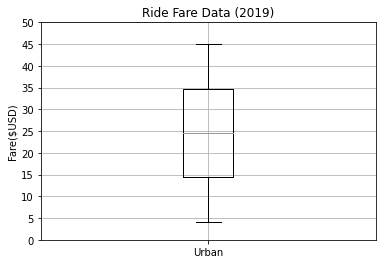

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [46]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

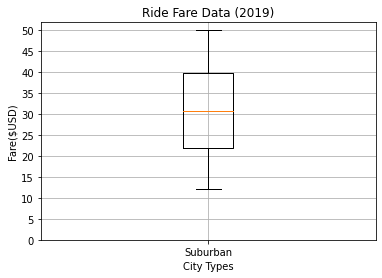

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [47]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

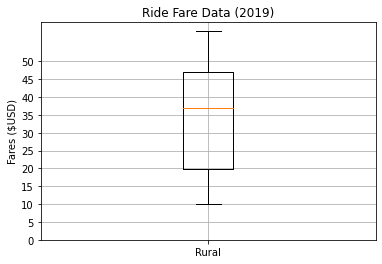

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [48]:
#Rural box and whisker for for fares
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
rural_fares.describe()

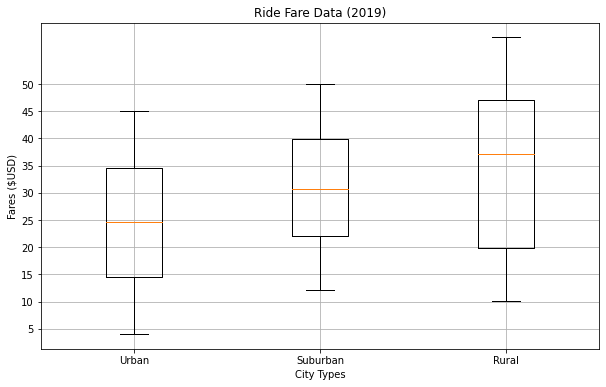

In [49]:
#Total box and whisker for fares
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares ($USD)")
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.boxplot(ride_fare_data, labels=x_labels)
ax.grid()
#Save
plt.savefig("analysis/Fig3.png")
plt.show()

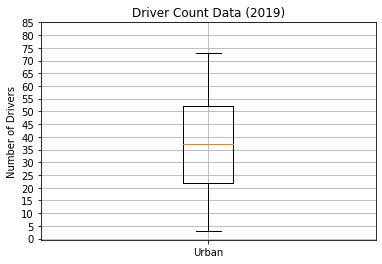

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [50]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

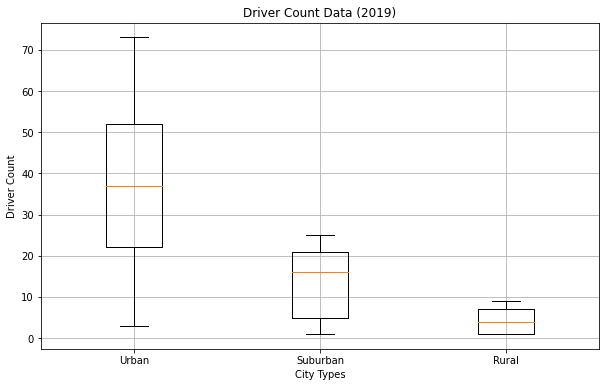

In [51]:
#Total box and whisker for driver count data
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Driver Count")
ax.set_xlabel("City Types")
ax.boxplot(driver_count_data, labels=x_labels)
ax.grid()
#Save
plt.savefig("analysis/Fig4.png")
plt.show()

In [53]:
#Total Fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type                                          

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [54]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [55]:
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

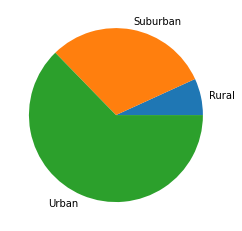

In [56]:
#Build the pie chart
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

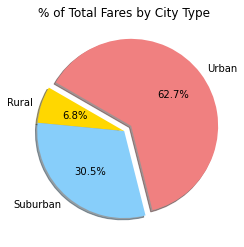

In [58]:
#Build pie chart with labels etc.
plt.pie(type_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct="%1.1f%%",
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#SHow fig
plt.show()

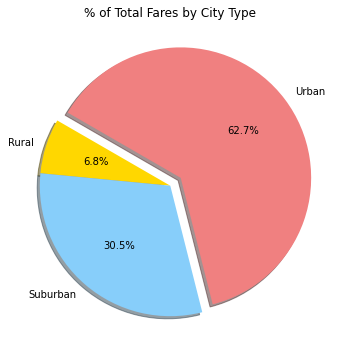

In [59]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [61]:
#Get the percent of rides per city
ride_percents = pyber_data_df.groupby(["type"]).sum()["ride_id"] / pyber_data_df.sum()["ride_id"] * 100
ride_percents

type
Rural        5.005212
Suburban    26.766722
Urban       68.228066
Name: ride_id, dtype: float64

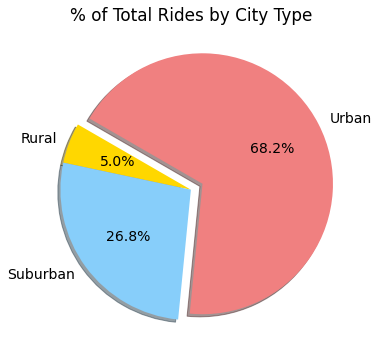

In [70]:
#Create pie chart for ride percents
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#Change font
mpl.rcParams["font.size"] = 14
#Save
plt.savefig("analysis/Fig6.png")
#show
plt.show()

In [ ]:
#Get percent of driver by city
